In [1]:
from keras.datasets import cifar10
# loading the dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.1))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history=model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)
Epoch 1/50
391/391 [==============================] - 17s 20ms/step - loss: 1.7123 - accuracy: 0.3549 - val_loss: 1.3337 - val_accuracy: 0.5094
Epoch 2/50
391/391 [==============================] - 8s 19ms/step - loss: 1.2827 - accuracy: 0.5370 - val_loss: 1.0840 - val_accuracy: 0.6148
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 1.0934 - accuracy: 0.6148 - val_loss: 1.0598 - val_accuracy: 0.6250
Epoch 4/50
391/391 [==============================] - 8s 19ms/step - loss: 0.9740 - accuracy: 0.6582 - val_loss: 0.9424 - val_accuracy: 0.6711
Epoch 5/50
391/391 [==============================] - 8s 20ms/step - loss: 0.8723 - accuracy: 0.6935 - val_loss: 0.9309 - val_accuracy: 0.6762
Epoch 6/50
391/391 [==============================] - 8s 20ms/step - loss: 0.7936 - accuracy: 0.7247 - val_loss: 0.9053 - val_accuracy: 0.6894
Epoch 7/50
391/391 [==============================] - 8

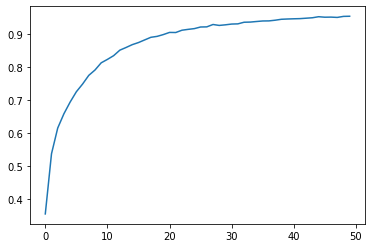

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
print(history.histort['accuracy'])